In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
population_datasets = ['moons_population_10_10_30214803.csv', 
                       'circles_population_10_10_30214804.csv', 
                       'linearly_separable_population_10_10_30214802.csv']
hof_datasets = ['moons_hof_10_10_30214803.csv', 
                'circles_hof_10_10_30214804.csv', 
                'linearly_separable_hof_10_10_30214802.csv']

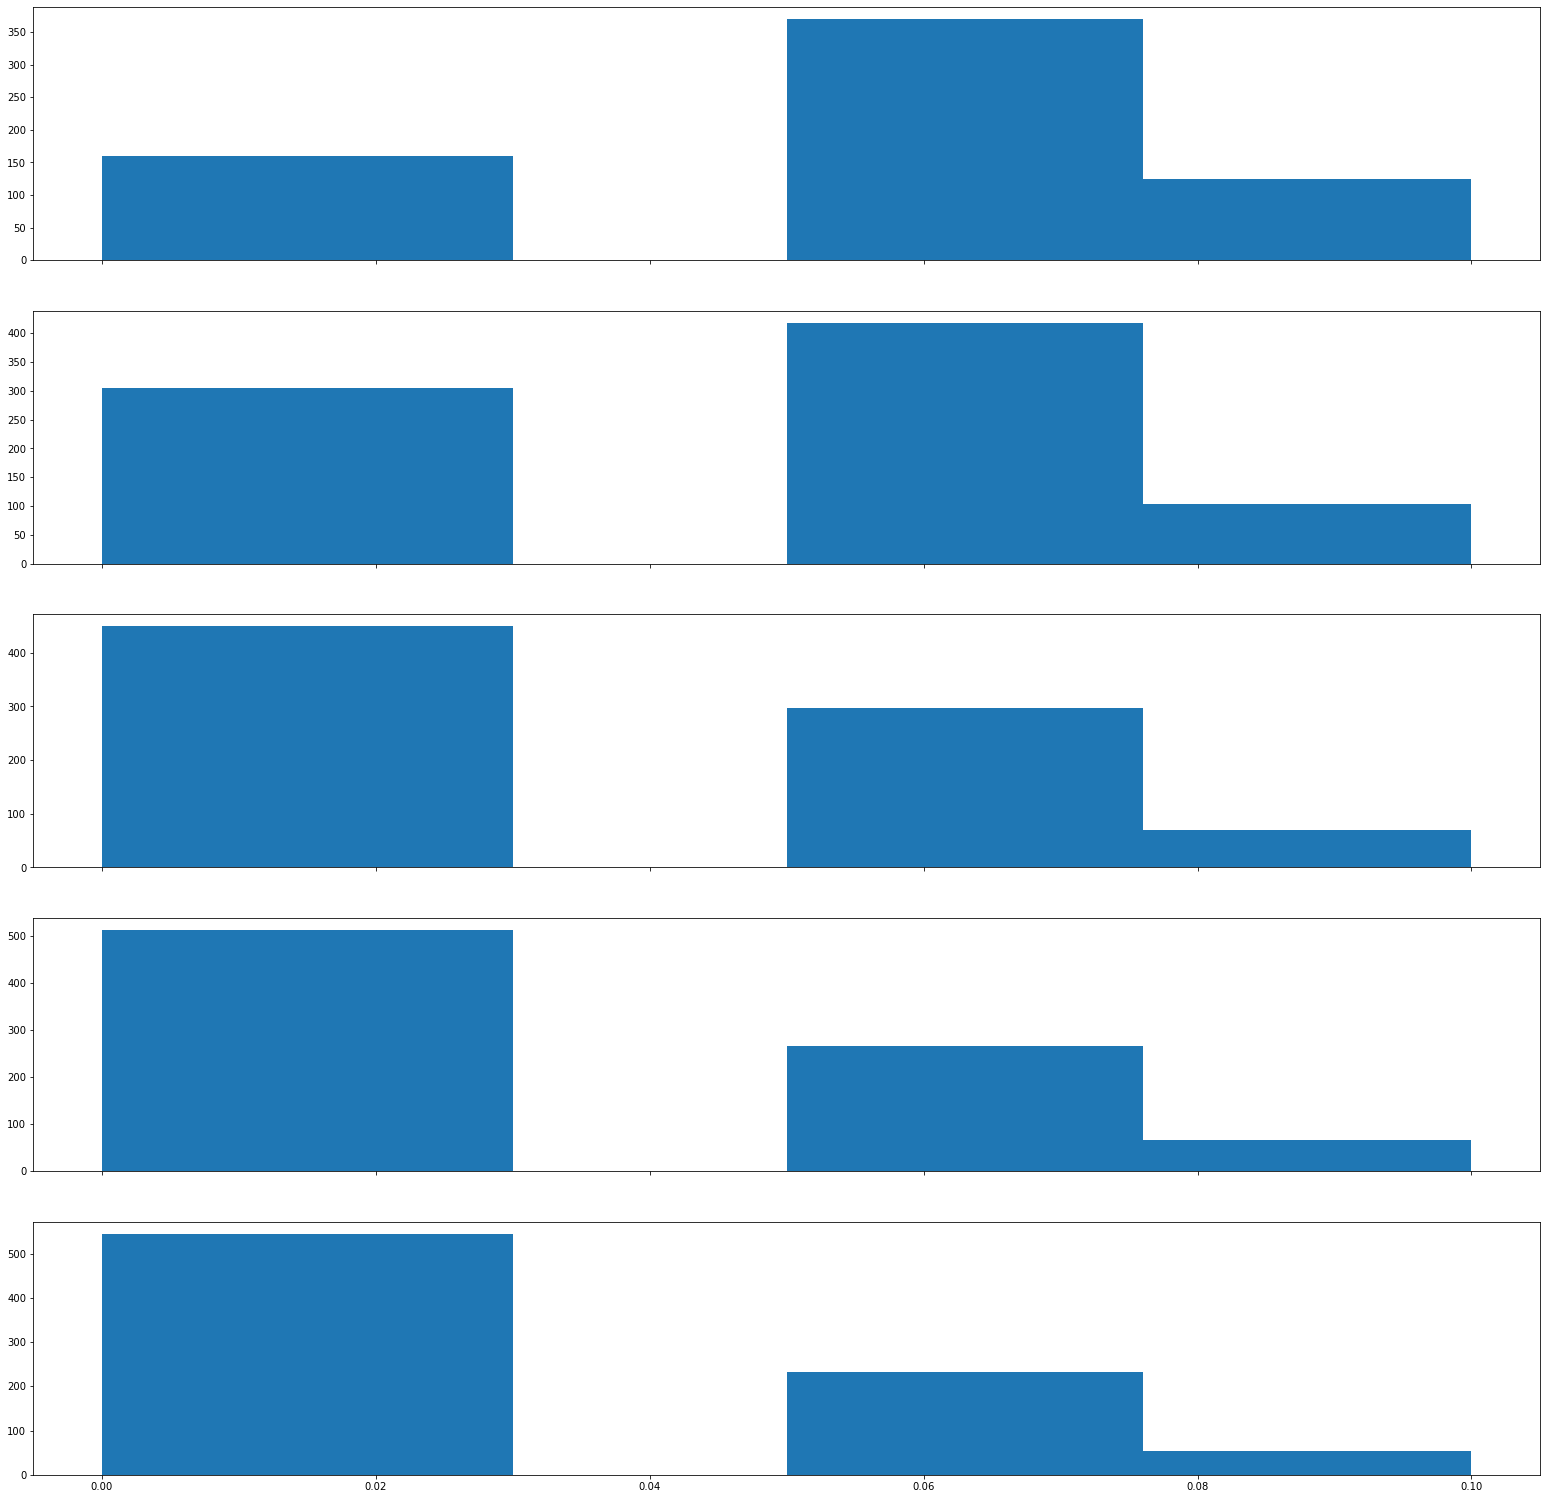

In [3]:
# Examine distribution of fitness over each generation
# We observe that with each coming generation more of the population has the min 
# fitness value.

# Observing the aggregate of all trials we observe that the first bin increases
# with each generation.
idx = 0
hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=';')
population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=';')

median = []
mean = []
min_val = []
max_val = []

num_subplots = 5
fig, axs = plt.subplots(num_subplots, figsize=(27,27), sharex=True,)
for i in range(11):
    rows = population_df[population_df[0]==i]
    fitness = rows[2]
    axs[i].hist(fitness, bins=[0,0.03, 0.05, 0.076, 0.1])
    if i + 1 == num_subplots:
        break

In [4]:
# Using a line plot we show how generational fitness average changes
# Using means of means and standard deviation of the sample means

generations = list(range(0, 11))

# rials x generation number
trial_means = np.zeros((100, 11))

population_df.head(10 * 11)
population_df[10*11: 10*11*2]

for i in range(0, 100):
    sample = population_df[10*11*i: 10*11*(i+1)]
    for j in range(0, 11):
        # Get all rows for generation j
        rows = sample[sample[0] == j]
        trial_means[i,j] = (rows[2].mean())

In [5]:
means_of_means = np.zeros(11)
for i in range(11):
    means_of_means[i] = trial_means[:,i].mean()

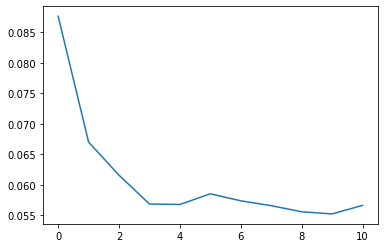

In [6]:
plt.plot(generations, means_of_means)

In [7]:
std_sample_means = np.zeros(11)
for i in range(11):
    rows = population_df[population_df[0] == i]
    pop_std = rows[2].std()
    std_sample_means[i] = pop_std/np.sqrt(10)

std_sample_means

array([0.01530873, 0.01392098, 0.01464595, 0.0139733 , 0.01487679,
       0.01502983, 0.01464882, 0.01443339, 0.01426211, 0.01389336,
       0.0144311 ])

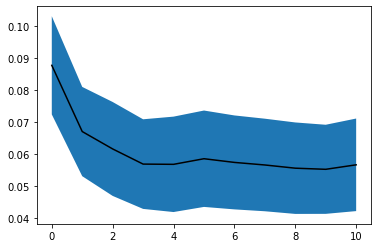

In [8]:
# Plot error range using 1 standard deviation
plt.plot(generations, means_of_means, 'k-')
plt.fill_between(generations, means_of_means - std_sample_means, means_of_means + std_sample_means)

In [9]:
# Using a line plot we show how generational fitness hof changes
# Using means of means and standard deviation of the sample means

generations = list(range(0, 11))

# rials x generation number
hof_trial_means = np.zeros((100, 11))

for i in range(0, 100):
    sample = hof_df[10*11*i: 10*11*(i+1)]
    for j in range(0, 11):
        # Get all rows for generation j
        rows = sample[sample[0] == j]
        hof_trial_means[i,j] = (rows[2].mean())

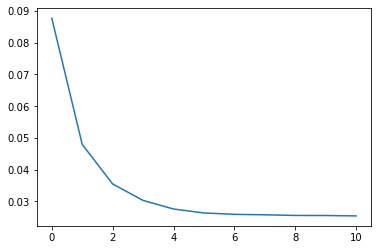

In [10]:
hof_means_of_means = np.zeros(11)
for i in range(11):
    hof_means_of_means[i] = hof_trial_means[:,i].mean()
plt.plot(generations, hof_means_of_means)

In [11]:
hof_std_sample_means = np.zeros(11)
for i in range(11):
    rows = hof_df[population_df[0] == i]
    pop_std = rows[2].std()
    hof_std_sample_means[i] = pop_std/np.sqrt(10)

hof_std_sample_means

array([0.01530873, 0.00708025, 0.00437254, 0.00335234, 0.00250094,
       0.00190449, 0.00163169, 0.00152096, 0.00121056, 0.00118568,
       0.0010516 ])

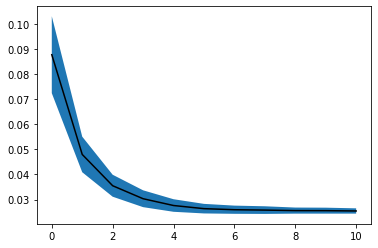

In [12]:
plt.plot(generations, hof_means_of_means, 'k-')
plt.fill_between(generations, hof_means_of_means - hof_std_sample_means, hof_means_of_means + hof_std_sample_means)

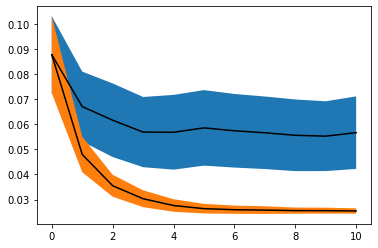

In [13]:
# Plot error range using 1 standard deviation
plt.plot(generations, means_of_means, 'k-')
plt.fill_between(generations, means_of_means - 1 *std_sample_means, means_of_means + 1*std_sample_means)
plt.plot(generations, hof_means_of_means, 'k-')
plt.fill_between(generations, hof_means_of_means - 1*hof_std_sample_means, hof_means_of_means + 1*hof_std_sample_means)

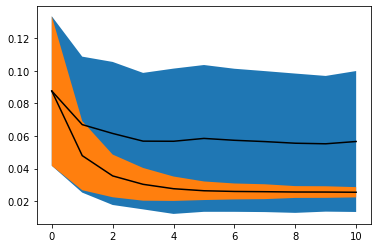

In [14]:
# Plot error range using 3 standard deviations
plt.plot(generations, means_of_means, 'k-')
plt.fill_between(generations, means_of_means - 3 *std_sample_means, means_of_means + 3*std_sample_means)
plt.plot(generations, hof_means_of_means, 'k-')
plt.fill_between(generations, hof_means_of_means - 3*hof_std_sample_means, hof_means_of_means + 3*hof_std_sample_means)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot all data using min, mean, max error regions

population_datasets = ['moons_population_10_10_30214803.csv', 
                       'circles_population_10_10_30214804.csv', 
                       'linearly_separable_population_10_10_30214802.csv']
hof_datasets = ['moons_hof_10_10_30214803.csv', 
                'circles_hof_10_10_30214804.csv', 
                'linearly_separable_hof_10_10_30214802.csv']


idx = 0
hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=';')
population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=';')

generations = list(range(11))
generation_mean = np.zeros(11)
generation_median = np.zeros(11)
generation_min = np.zeros(11)
generation_max = np.zeros(11)

hof_mean = np.zeros(11)
hof_median = np.zeros(11)
hof_min = np.zeros(11)
hof_max = np.zeros(11)

for i in range(0, 11):
    rows = population_df[population_df[0] == i]
    generation_mean[i] = (rows[2].mean())
    generation_median[i] = (rows[2].median())
    generation_min[i] = (rows[2].min())
    generation_max[i] = (rows[2].max())
    
    rows = hof_df[hof_df[0] == i]
    hof_mean[i] = (rows[2].mean())
    hof_median[i] = (rows[2].median())
    hof_min[i] = (rows[2].min())
    hof_max[i] = (rows[2].max())

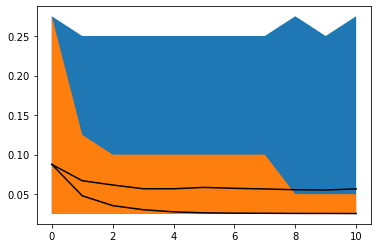

In [16]:
# This plot shows the mean values of the generation fitness and the hall of fame fitness
# It shows that the mean line actually lines within the range of the Hall of fame
plt.plot(generations, generation_mean, 'k-')
plt.fill_between(generations, generation_min, generation_max)
plt.plot(generations, hof_mean, 'k-')
plt.fill_between(generations, hof_min, hof_max)

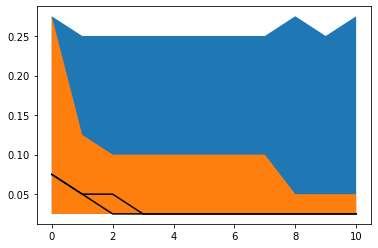

In [17]:
# This plot shows the median values of the generation fitness and the hall of fame fitness
# It shows that the median line actually lines within the range of the Hall of fame
# and converges with it rather quickly. Indicating that the problem may not be difficult.
plt.plot(generations, generation_median, 'k-')
plt.fill_between(generations, generation_min, generation_max)
plt.plot(generations, hof_median, 'k-')
plt.fill_between(generations, hof_min, hof_max)